<a href="https://colab.research.google.com/github/jdsmithwes/Telco-Data-Churn/blob/master/Module3_project_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Telco Churn Project
Jamaal Smith 





In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
from sklearn.metrics import classification_report

## Data Import and Cleaning

### First Impressions of Data

In [4]:
#import the data
df = pd.read_csv('churn_data.csv')
from scrubbing import info
from scrubbing import null
info(df)

The dataframe has a shape of:

 (3333, 21)
The dataframe has the following datatypes:

 state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
The total number of each datatype is:


 float64    8
int64      8
object     4
bool       1
dtype: int64


state  account length  ...  customer service calls  churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 21 columns]

In [5]:
#Null values in dataset, module function wouldn't work
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Based on initial review of the data, we can conclude that the dataset is comprised of 21 columns and 3333 rows. Further, there are no null values in the data set.

The next step in preparing the data for the model is to convert the object type in the phone number, international plan, and voicemail plan columns for the machine learning model.

For now, I will only focus on the international and voicemail plan columns. I made this decision because the phone number a person is assigned plays no role in whether or not a person keeps their service.

###Phone Number & State Column Treatment

In [0]:
#phone number alone cannot forecast whether someone churns or not
df = df.drop('phone number',axis=1)
df = df.drop('state',axis=1)

### Categorical Variable Encoding



In [7]:
from sklearn.preprocessing import LabelEncoder
df_encode=df.drop('churn',axis =1)


category = [key for key in dict(df_encode.dtypes) if dict(df_encode.dtypes)[key] in ['bool','object']]

LE = LabelEncoder()
for i in category:
    LE.fit(df[i])
    df_encode[i] = LE.transform(df_encode[i])
df_encode.head(5)

account length  area code  ...  total intl charge  customer service calls
0             128        415  ...               2.70                       1
1             107        415  ...               3.70                       1
2             137        415  ...               3.29                       0
3              84        408  ...               1.78                       2
4              75        415  ...               2.73                       3

[5 rows x 18 columns]

As noted before, since it is hard to argue that a given phone number has any relation to churn rate, this column will be eliminated now as part of the feature selection process.

## Data Distribution Visualization

Based on the pairplot shown above, most of the data appears to be normally distributed without any noticeable outliers. 

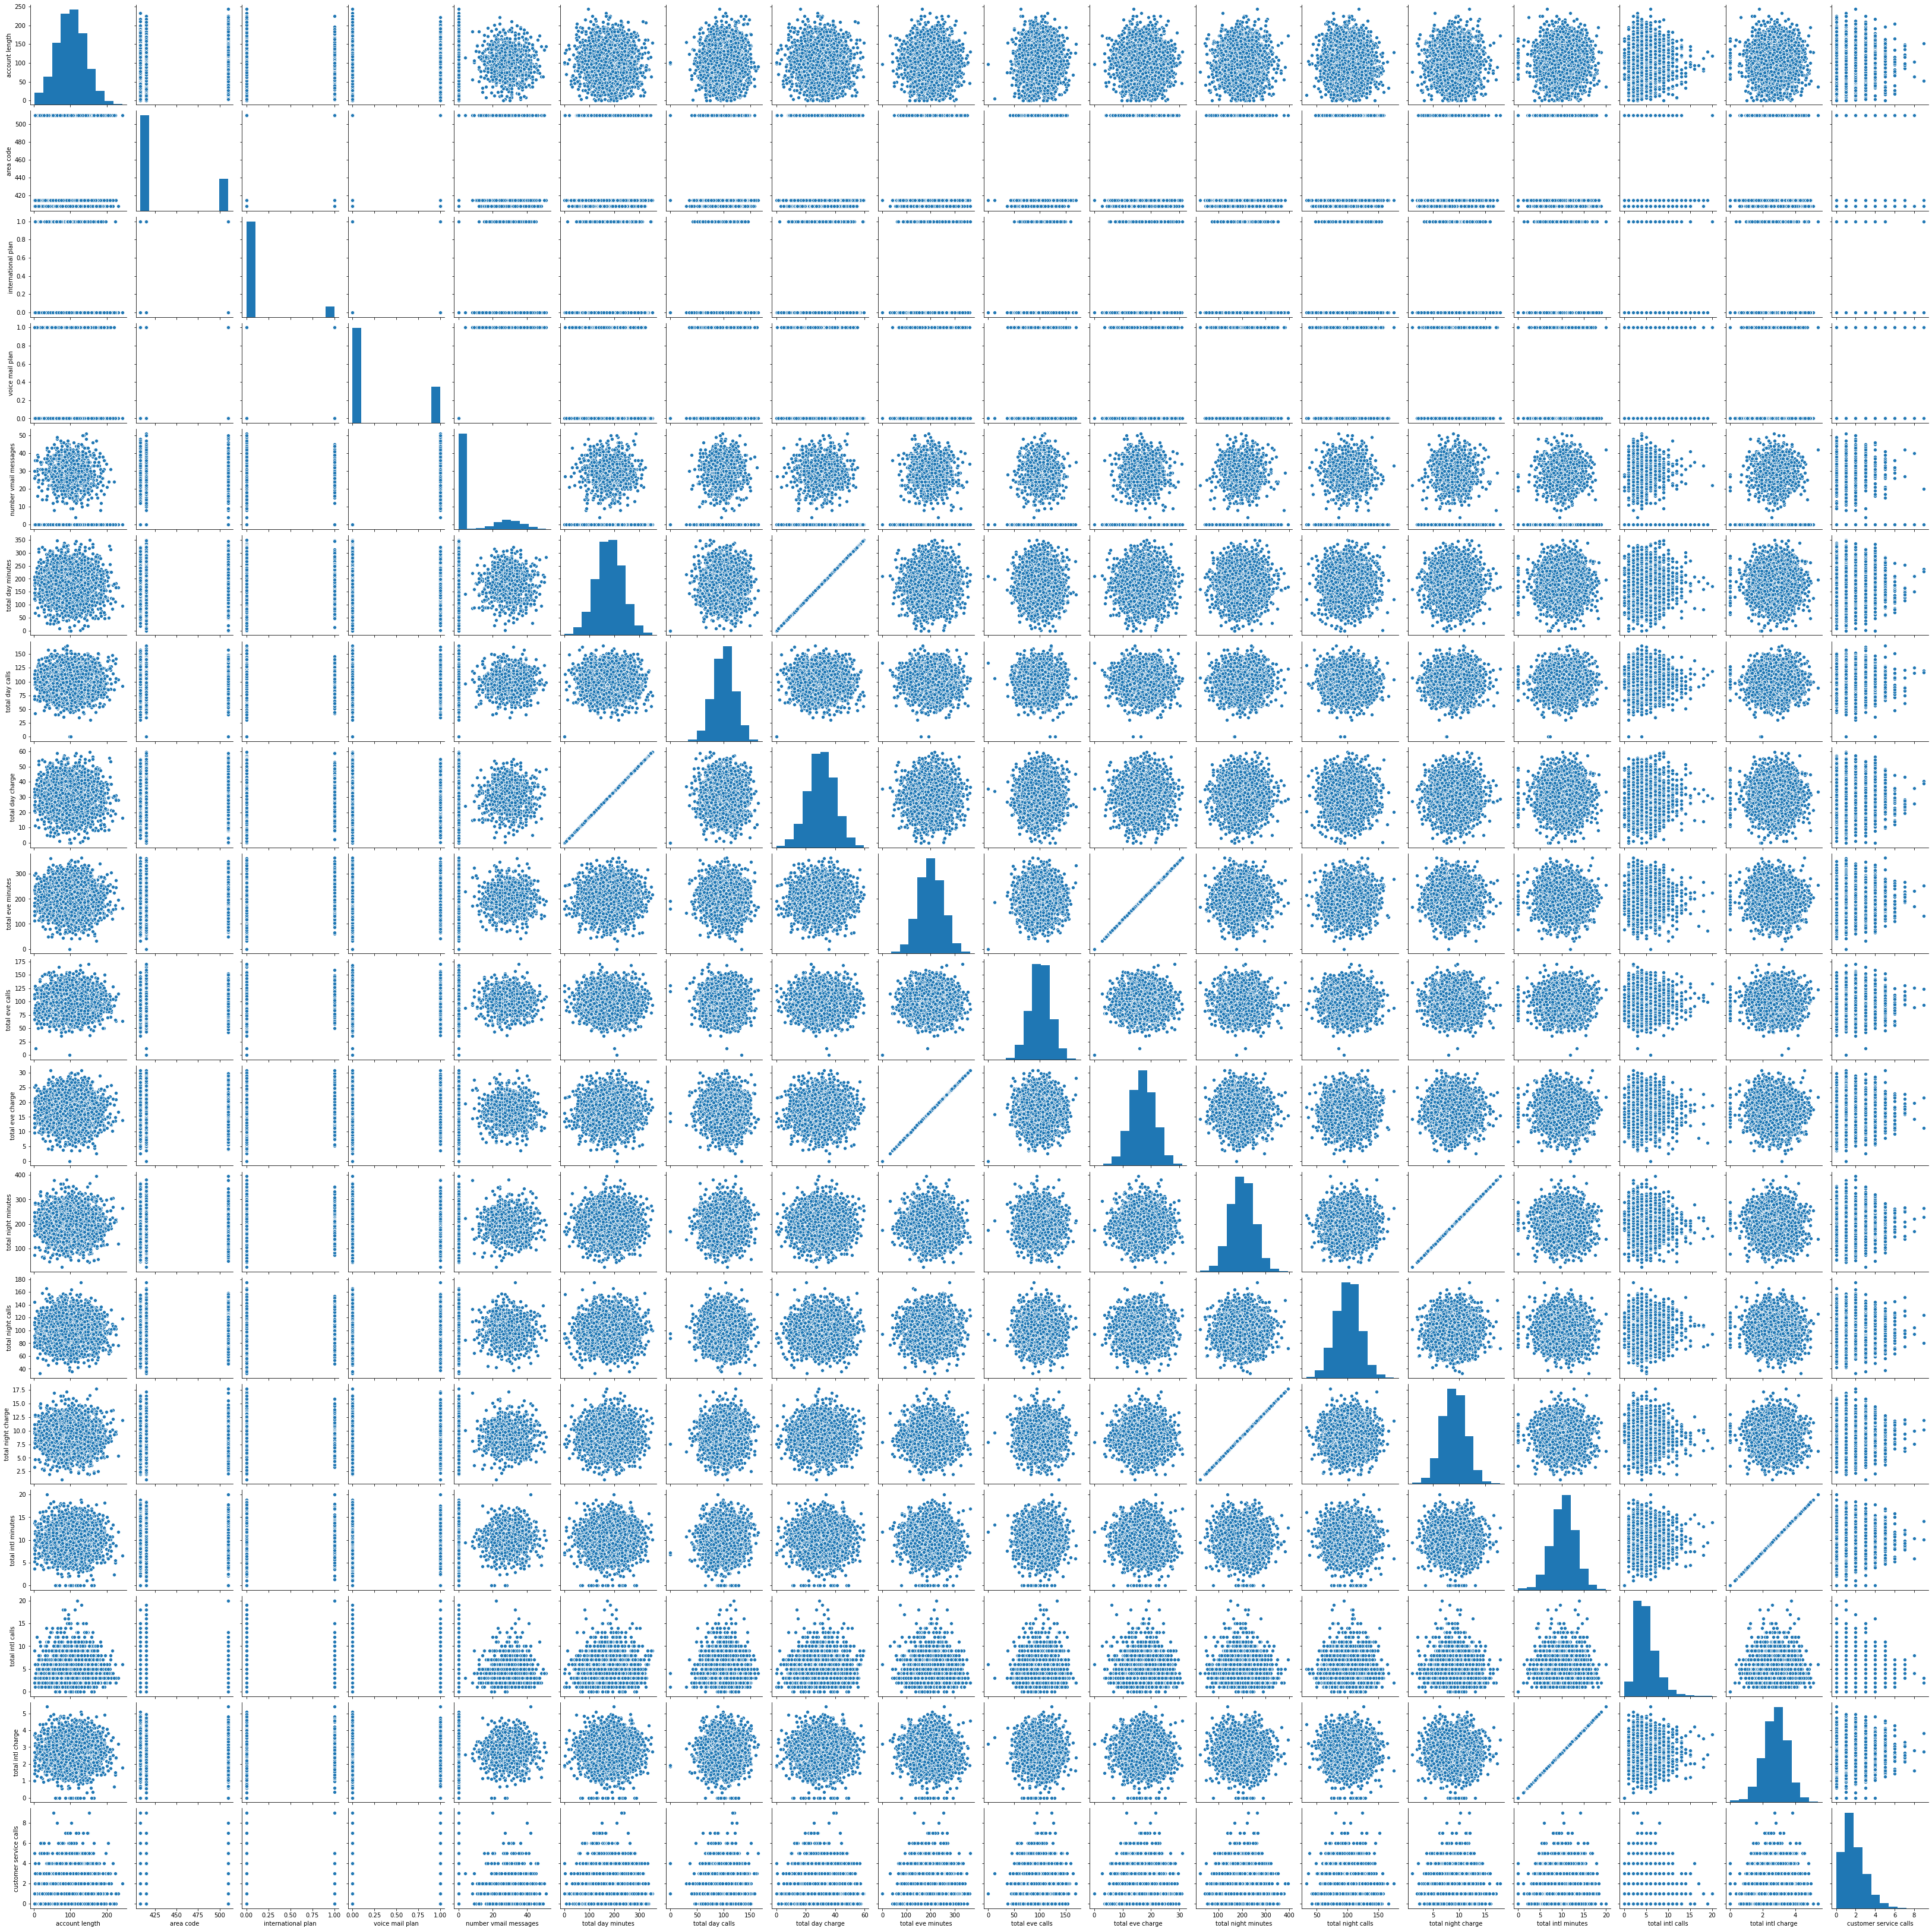

In [44]:
import seaborn as sns

data = df_encode
sns.pairplot(data)
plt.show()

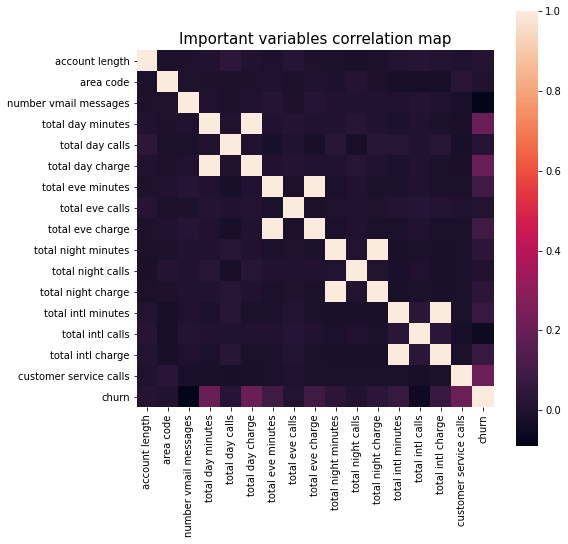

In [100]:
#heatmap to determine whether any multicollinearity exists in data
corrmat = df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

Based on the heatmap, any correlations that exist in dataset make sense as they are related items. For instance, international call charges move in tandem with minutes of international calls

##Assigning the independent and dependent variabls

In [0]:
y = df['churn']
X = df_encode

The pairplot graph highlights that all of the non-boolean dataframes are somewhat normally distributed. To optimize later model performance, data will be standardized and outliers treated. Again, the above visualization suggests that the data should only endure minor adjustments.

Of all the datasets, the number of voicemail data appears to have lots of 0s in its distribution.

For now, the states column will be left in the dataset and later feature selection measures will provide a statistically significant method for determining whether or not this explanatory variable will be included in the final model.

###Examination of the Churn Column

In [9]:
a = (df['churn'].sum())
b = (len(df['churn']))
percent_churn = a/b

print('The percentage of Churn in dataset is:', percent_churn)

The percentage of Churn in dataset is: 0.14491449144914492


### Splitting Data into Training and Test Data Sets

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Models

##Support Vector Machine Classification

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42,)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_predSVM = classifier.predict(X_test)

The Accuracy Score for this model is 0.856


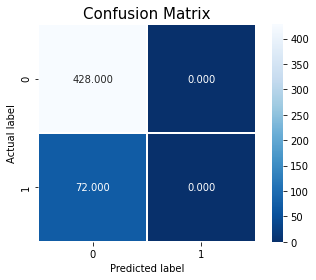

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predSVM)
acc = accuracy_score(y_test,y_predSVM)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


###SVM Classification Report

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predSVM))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.00      0.00      0.00        72

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.73      0.86      0.79       500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
SVM_all = [classifier.__class__,accuracy_score(y_test,y_predSVM),roc_auc_score(y_test,y_predSVM)]
results = pd.DataFrame([CVM_all])

###Feature Importance

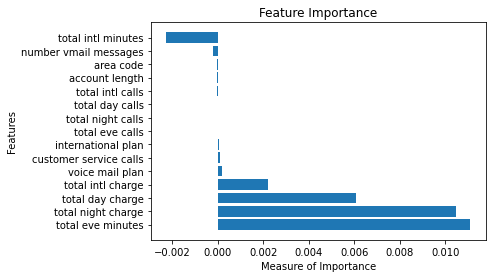

In [16]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.ylabel('Features')
    plt.xlabel('Measure of Importance')
    plt.title('Feature Importance')
    plt.show()

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances((classifier.coef_[0]), list(df_encode.columns), top=15)


##SVM with limited features

###Assigning data variables, splitting data, running model

In [0]:
X = df.iloc[:,[9,14,8,17]].values
y = df.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split
X_trainfew, X_testfew, y_trainfew, y_testfew = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_trainfew = sc.fit_transform(X_trainfew)
X_testfew = sc.transform(X_testfew)

In [29]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,)
classifier.fit(X_trainfew, y_trainfew)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_predSVMfew = classifier.predict(X_testfew)

### Model Performance of SVM with Limited Features

The Accuracy Score for this model is 0.868


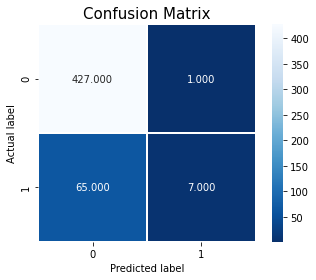

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_testfew,y_predSVMfew)
acc = accuracy_score(y_testfew,y_predSVMfew)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);

###Support Vector Machine with Limited Feature Elimination Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_testfew,y_predSVMfew))

              precision    recall  f1-score   support

       False       0.87      1.00      0.93       428
        True       0.88      0.10      0.18        72

    accuracy                           0.87       500
   macro avg       0.87      0.55      0.55       500
weighted avg       0.87      0.87      0.82       500



In [0]:
SVM_limited = [classifier.__class__,accuracy_score(y_testfew,y_predSVMfew),roc_auc_score(y_testfew,y_predSVMfew)]
results = results.append([SVM_limited])

###Support Vector Machine with Two Features

In [0]:
X = df.iloc[:,[9,14]].values
y = df.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify= y)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train2,y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_predSVC2 = classifier.predict(X_test2)

The Accuracy Score for this model is 0.856


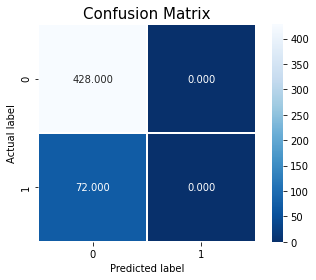

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_testfew,y_predSVC2)
acc = accuracy_score(y_testfew,y_predSVC2)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);

###Support Vector Machine with Two Feature Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,y_predSVC2))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.00      0.00      0.00        72

    accuracy                           0.86       500
   macro avg       0.43      0.50      0.46       500
weighted avg       0.73      0.86      0.79       500



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
SVM_2 = [classifier.__class__,accuracy_score(y_test2,y_predSVC2),roc_auc_score(y_test2,y_predSVC2)]
results = results.append([SVM_2])

### Visualization of SVM Results on Training Set

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train2, y_train2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Total Intl Min')
plt.ylabel('Total Eve Calls')
plt.legend()
plt.show()

In [94]:
df_encode.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

### Visualization of SVM Results on Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


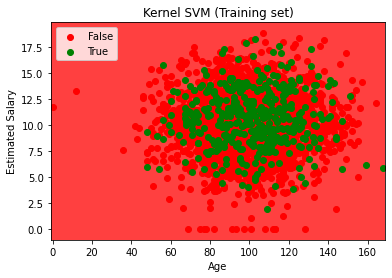

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test2, y_test2
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Total Intl Min')
plt.ylabel('Total Eve Calls')
plt.legend()
plt.show()

## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logclassifer = LogisticRegression()
logclassifer.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predlog = logclassifer.predict(X_test)

The Accuracy Score for this model is 0.858


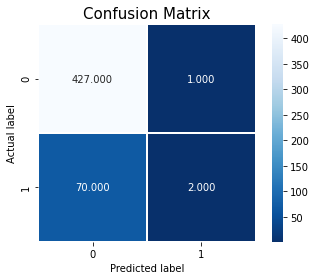

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_predlog)
acc = accuracy_score(y_test,y_predlog)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title('Confusion Matrix', size = 15);


###Logistic Regression Classifiction Report


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predlog))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.67      0.03      0.05        72

    accuracy                           0.86       500
   macro avg       0.76      0.51      0.49       500
weighted avg       0.83      0.86      0.80       500



In [0]:
logreg = [logclassifer.__class__,accuracy_score(y_test,y_predlog),roc_auc_score(y_test,y_predlog)]
results = results.append([logreg])

###Recursive Feature Elimination

In [53]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
selector = RFE(estimator,1,step=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)
logclassifer.coef_

[4 3 2 1]


array([[0.07168838, 0.21304386, 0.32592315, 0.49703677]])

In [0]:
y_predlogfeat = selector.predict(X_test)

###Model Performance with Feature Elimanation

The Accuracy Score for this model is 0.856


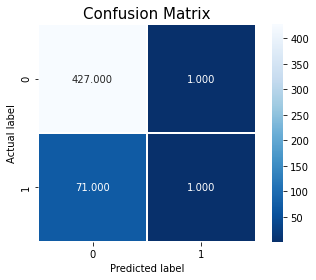

In [56]:
y_predfeature = selector.predict(X_test)
cm = confusion_matrix(y_test,y_predlogfeat)
acc = accuracy_score(y_test,y_predlogfeat)
print('The Accuracy Score for this model is {acc}'.format(acc=acc))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {acc}'.format(acc = acc)
plt.title('Confusion Matrix', size = 15);

###Logistic Regression with Feature Elimination Classification Report

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predfeature))

              precision    recall  f1-score   support

       False       0.86      1.00      0.92       428
        True       0.50      0.01      0.03        72

    accuracy                           0.86       500
   macro avg       0.68      0.51      0.47       500
weighted avg       0.81      0.86      0.79       500



###Visualization of Logistic Regression with Feature Selection

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


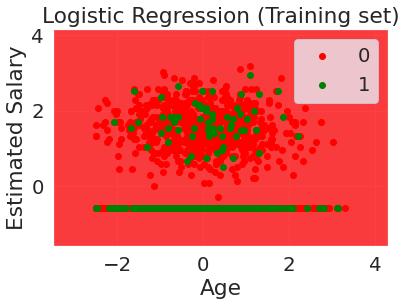

In [0]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()